In [5]:
import networkx as nx

## To calculate theta
def calculate_threshold(user_graph):     
    degree  = 0
    for e in user_graph:
        degree += e
    return degree/len(user_graph)

## returns a true/false list of activated nodes 
## a node is active if it's in-degree >= theta
def active_path(user_graph):
    theta = calculate_threshold(user_graph)
    active_graph = []
    l = len(user_graph)
    for i in range(0,l):
        active_graph.append(False)
        if(user_graph[i]>=theta):
            active_graph[i]=True
    return active_graph


## reads a file containing adjacency matrix of a graph
## only reads the in-degrees of the nodes
def get_matrix(file):
    file = open(file,'r') 
    data = file.read() 
    data = data.split("\n") 
    matrix = [] 
    for d in data: 
        m = [] 
        for e in d: 
            m.append(e) 
        matrix.append(m)
    file.close()
    return matrix

## takes the adjacency matrix read from file using get_matrix()
## returns the list of in-degrees of individual nodes
def calculate_degrees(matrix):
    degree_list = []
    for row in matrix:
        c = 0
        for element in row:
            if element == '1':                
                c += 1
        degree_list.append(c)
    return degree_list

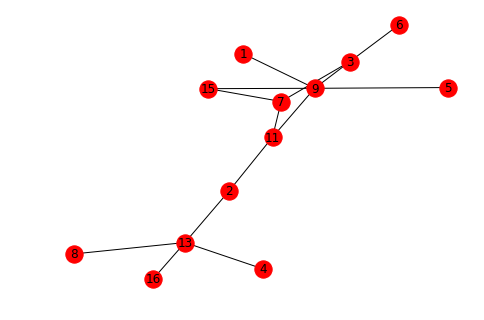

In [43]:

matrix = get_matrix('datasets/dataset1.txt')  # makes the matrix from file
dlist = calculate_degrees(matrix) # list of the degree of each node
activated_nodes = active_path(dlist) # true/false list of activated nodes




## adds one row on top  and one column on left of the matrix read from file 
## in order to make the user graph start from 1 instead of 0 
## final matrix will be new_matrix
temp_matrix = []
l = len(matrix)

for i in range(0,l):  # to add a '0' as first column of each row in matrix
    m = ["0"]    
    for j in range (0,l):
        m.append(matrix[i][j])    
    temp_matrix.append(m)

    
top_row = []
for i in range(0,l+1):  # makes a '0' row to be added on top of matrix
    top_row.append("0")
new_matrix = [top_row]  # adds top row to the new matrix
for i in range(0,l):
    new_matrix.append(temp_matrix[i]) # appends the rest of matrix to the new_matrix

#draws the graph of orignial matrix
# isolated nodes are not displayed
g = nx.Graph()
l = len(new_matrix) 
for i in range(0,l):
    for j in range(0,l):        
        if(new_matrix[i][j]=="1"):
            g.add_edge(i,j)
nx.draw(g,with_labels=1)
   


[False, True, False, True, True, False, True, False, True, False, True, False, True, False, True, True]


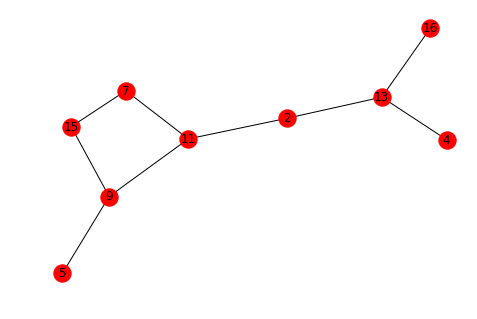

In [49]:
#draws the graph of only activated nodes


# to check if there are more than one nodes in the activated graph
count = 0
index = 0
print(activated_nodes)
for i in range(0,len(activated_nodes)):
    if activated_nodes[i]:
        index = i
        count += 1

g = nx.Graph()
if(count==1): #if there is only one node in the activated graph
    g.add_node(index+1)
else:
    l = len(new_matrix)
    for i in range(0,l):
        for j in range(0,l):        
            if(new_matrix[i][j]=="1"):
                if activated_nodes[i-1] & activated_nodes[j-1]:
                    g.add_edge(i,j)
nx.draw(g,with_labels=1)


